In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use('seaborn')
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("Travel_scrape.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8051 entries, 0 to 8050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Hotel          8051 non-null   object 
 1   Room Type      8051 non-null   object 
 2   Rate           8051 non-null   object 
 3   Check-in Date  8051 non-null   object 
 4   Search Date    8051 non-null   object 
 5   Search Time    8051 non-null   object 
 6   Unnamed: 6     0 non-null      float64
dtypes: float64(1), object(6)
memory usage: 440.4+ KB


In [4]:
df.isnull().sum()

Hotel               0
Room Type           0
Rate                0
Check-in Date       0
Search Date         0
Search Time         0
Unnamed: 6       8051
dtype: int64

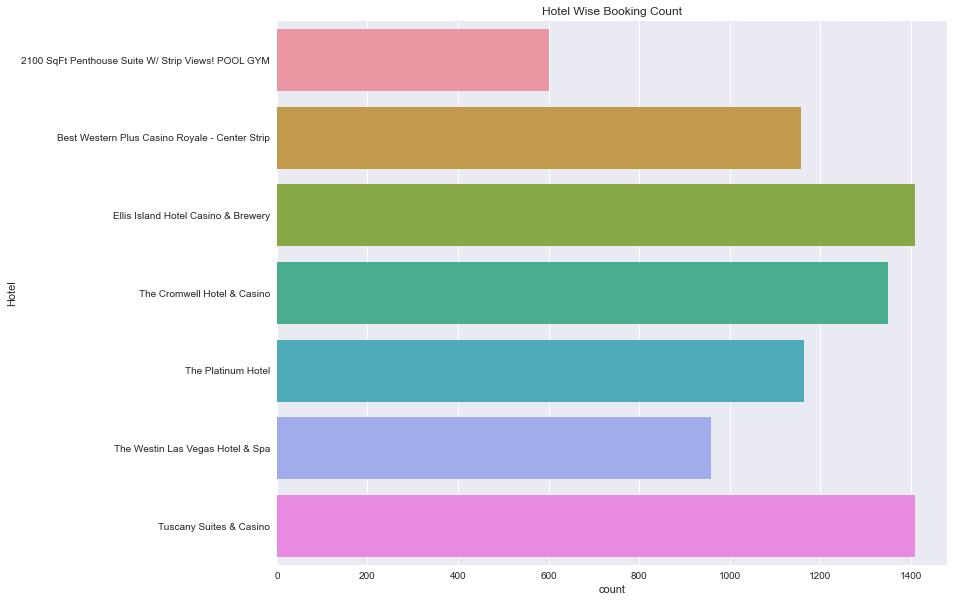

In [5]:
plt.figure(figsize=(12,10))
sns.countplot(y='Hotel',data=df)
plt.title('Hotel Wise Booking Count')
plt.show()

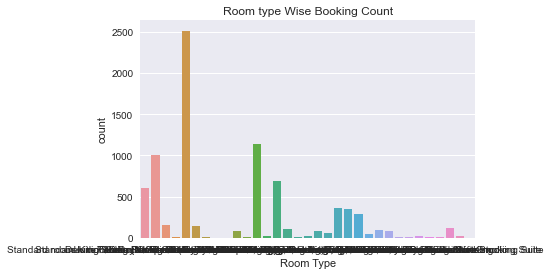

In [6]:
sns.countplot(x='Room Type' , data= df)
plt.title('Room type Wise Booking Count')
plt.show()

In [7]:
df = df.drop('Unnamed: 6', axis=1)
df.head()

,Hotel,Room Type,Rate,Check-in Date,Search Date,Search Time
0,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,0:00:00
1,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,1:00:00
2,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,2:00:00
3,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,3:00:00
4,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,US$254,2022-08-03,2022-08-03,4:00:00


In [8]:
df['Check-in Date'] = pd.to_datetime(df['Check-in Date'])
df['Search Date'] = pd.to_datetime(df['Search Date'])

In [9]:
df['Date_gap'] = df['Check-in Date'] - df['Search Date']
df['Date_gap'] = df['Date_gap'].astype(str)
df["Date_gap"]= df["Date_gap"].replace( r"days","", regex=True)

# Remove $ mark in Rate Column
df['Rate'] = df['Rate'].apply(lambda x: x[3:])
df.head()

,Hotel,Room Type,Rate,Check-in Date,Search Date,Search Time,Date_gap
0,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,2022-08-03,2022-08-03,0:00:00,0
1,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,2022-08-03,2022-08-03,1:00:00,0
2,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,2022-08-03,2022-08-03,2:00:00,0
3,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,2022-08-03,2022-08-03,3:00:00,0
4,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,2022-08-03,2022-08-03,4:00:00,0


In [10]:
df['check_in_year'] = pd.DatetimeIndex(df['Check-in Date']).year
df['check_in_month'] = pd.DatetimeIndex(df['Check-in Date']).month
df['check_in_date'] = pd.DatetimeIndex(df['Check-in Date']).day

df = df.drop('Check-in Date', axis=1)
df = df.drop('Search Date', axis=1)
df.tail()


,Hotel,Room Type,Rate,Search Time,Date_gap,check_in_year,check_in_month,check_in_date
8046,Tuscany Suites & Casino,Executive Suite,121,21:00:00,13,2022,8,20
8047,Tuscany Suites & Casino,Executive Suite,139,22:00:00,13,2022,8,20
8048,Tuscany Suites & Casino,Deluxe Executive King Non-Smoking Suite,168,23:00:00,13,2022,8,20
8049,Tuscany Suites & Casino,Executive Suite,143,0:00:00,12,2022,8,20
8050,Tuscany Suites & Casino,Executive Double Room,147,0:00:00,12,2022,8,20


In [11]:
df1 = df.copy()

In [12]:
df1.head()

,Hotel,Room Type,Rate,Search Time,Date_gap,check_in_year,check_in_month,check_in_date
0,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,0:00:00,0,2022,8,3
1,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,1:00:00,0,2022,8,3
2,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,2:00:00,0,2022,8,3
3,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,3:00:00,0,2022,8,3
4,2100 SqFt Penthouse Suite W/ Strip Views! POOL...,Penthouse Apartment,254,4:00:00,0,2022,8,3


In [13]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
from sklearn.model_selection import train_test_split


In [14]:
for i in df1.select_dtypes('object').columns:
    encoder = LabelEncoder()
    df1[i] = encoder.fit_transform(df1[i])

In [15]:
# Check the Correlation with "Rate" column to other columns

In [16]:
df1.tail()

,Hotel,Room Type,Rate,Search Time,Date_gap,check_in_year,check_in_month,check_in_date
8046,6,19,20,13,6,2022,8,20
8047,6,19,33,14,6,2022,8,20
8048,6,8,57,15,6,2022,8,20
8049,6,19,37,0,5,2022,8,20
8050,6,14,41,0,5,2022,8,20


In [19]:
df1 = df1.astype({"check_in_year":"int","check_in_month":"int"})

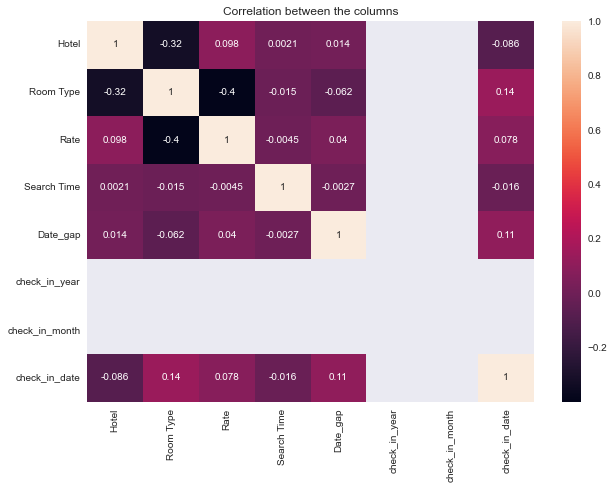

In [20]:
plt.figure(figsize=(10,7))
sns.heatmap(df1.corr(), annot=True)
plt.title('Correlation between the columns')
plt.show()

In [21]:
df1.corr()['Rate'].sort_values()

Room Type        -0.398470
Search Time      -0.004465
Date_gap          0.040234
check_in_date     0.077944
Hotel             0.097931
Rate              1.000000
check_in_year          NaN
check_in_month         NaN
Name: Rate, dtype: float64

In [22]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8051 entries, 0 to 8050
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Hotel           8051 non-null   int32
 1   Room Type       8051 non-null   int32
 2   Rate            8051 non-null   int32
 3   Search Time     8051 non-null   int32
 4   Date_gap        8051 non-null   int32
 5   check_in_year   8051 non-null   int32
 6   check_in_month  8051 non-null   int32
 7   check_in_date   8051 non-null   int64
dtypes: int32(7), int64(1)
memory usage: 283.2 KB


<AxesSubplot:title={'center':'Correlation between Hotel & Rate'}, xlabel='Hotel', ylabel='Rate'>

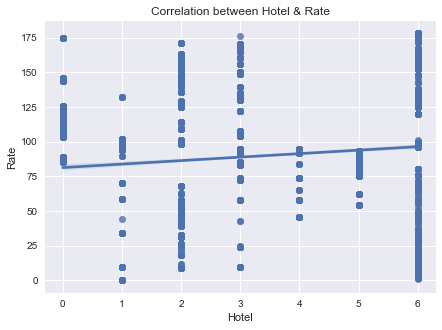

In [23]:
fig = plt.figure(figsize=(7,5))
plt.title('Correlation between Hotel & Rate')
sns.regplot(x='Hotel', y='Rate', data=df1 )

In [24]:
x= df1.drop('Rate' , axis=1)
y= df1['Rate']

In [25]:
print("Shape of x is :", x.shape)
print("Shape of y is :", y.shape)

Shape of x is : (8051, 7)
Shape of y is : (8051,)


In [26]:
# Split train test set 

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [28]:
print('Shape of x_train is: ', x_train.shape)
print('Shape of x_test is: ', x_test.shape)
print('Shape of y_train is: ', y_train.shape)
print('Shape of y_test is: ', y_test.shape)

Shape of x_train is:  (5635, 7)
Shape of x_test is:  (2416, 7)
Shape of y_train is:  (5635,)
Shape of y_test is:  (2416,)


In [29]:
scaler = StandardScaler()

In [30]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Linear Regression

In [31]:
linreg = LinearRegression()
linreg.fit(x_train, y_train)
linreg_pred = linreg.predict(x_test)

In [32]:
linreg_mae = mean_absolute_error(y_test, linreg_pred)
linreg_r2 = r2_score(y_test, linreg_pred)
print("MAE of Linear Regression model is : ", linreg_mae)
print("R2 Score of Linear Regression model is : ", linreg_r2)

MAE of Linear Regression model is :  38.01941484513516
R2 Score of Linear Regression model is :  0.1955301692249236


In [33]:
linreg_score = cross_val_score(linreg, x_test, y_test, cv=4)
print("Linear regression Model Accuuracy is: {}".format(linreg_score.mean()*100))

Linear regression Model Accuuracy is: 18.749780515531217


### Decision Tree

In [34]:
dtree = DecisionTreeRegressor()
dtree.fit(x_train, y_train)
dtree_pred = dtree.predict(x_test)

In [35]:
dtree_mae = mean_absolute_error(y_test, dtree_pred)
dtree_r2 = r2_score(y_test,dtree_pred)
print("MAE of Decision tree model is : ", dtree_mae)
print("R2 score of Decision tree model is : ", dtree_r2)

MAE of Decision tree model is :  1.5923013245033113
R2 score of Decision tree model is :  0.947328432779942


In [36]:
dtree_score = cross_val_score(dtree, x_test, y_test, cv=4)
print("Decision tree Model Accuuracy is: {}".format(dtree_score.mean()*100))

Decision tree Model Accuuracy is: 91.28725133324505


## XGBoost  - Gradient Boost

In [37]:
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

In [38]:
xgb_mae = mean_absolute_error(y_test, dtree_pred)
xgb_r2 = r2_score(y_test,dtree_pred)
print("MAE of xgboost model is : ", xgb_mae)
print("R2 score of xgboost model is : ", xgb_r2)

MAE of xgboost model is :  1.5923013245033113
R2 score of xgboost model is :  0.947328432779942


In [39]:
xgb_score = cross_val_score(xgb, x_test, y_test, cv=4)
print("XGBoost Model Accuuracy is: {}".format(xgb_score.mean()*100))

XGBoost Model Accuuracy is: 91.7921714693309


  ##      ------------------------------------------------------  Summary  -------------------------


 | Algorithm | Model Accuracy | r2 Score |
 | --- | --- | --- |
 | Linear Regression | 18.74% | 0.195 |
 | Decision Tree | 91.28% |  0.947 |
 | XGBoost - Gradient Boost | 91.79% | 0.947 |

In [40]:
df1.head()

,Hotel,Room Type,Rate,Search Time,Date_gap,check_in_year,check_in_month,check_in_date
0,0,24,85,0,1,2022,8,3
1,0,24,85,11,1,2022,8,3
2,0,24,85,16,1,2022,8,3
3,0,24,85,17,1,2022,8,3
4,0,24,85,18,1,2022,8,3


In [43]:
data = {'Hotel':0,'Room Type':24,'Search Time':12,'Date_gap':2,'check_in_year':2022,'check_in_month':6,'check_in_date':2}
index = [0]
new_df = pd.DataFrame(data, index)
new_df

,Hotel,Room Type,Search Time,Date_gap,check_in_year,check_in_month,check_in_date
0,0,24,12,2,2022,6,2


In [44]:
new_pred = xgb.predict(new_df)
print('The Booking price is: ',new_pred)

The Booking price is:  [82.77721]
